In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import missingno as msno
plt.style.use('seaborn')
sns.set(font_scale=1.5)

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [4]:
kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

labels_ 속성을 사용하면 데이터 포인트가 속한 군집 중심점 레이블 값을 알려준다.
fit만 해도 labels_ 속성을 사용할 수 있으며 predict을 하면 labels의 값과 동일한 값이 나온다.

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
iris_df['cluster'] = kmeans.labels_

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
iris_df['target'] = iris.target

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [9]:
iris_df.groupby(['target', 'cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                   2            2             2            2
       2                  48           48            48           48
2      0                  36           36            36           36
       2                  14           14            14           14

In [10]:
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

군집화 된것을 시각화해서 볼 것이다. 그런데 feature가 4개 이므로 2개로 축소후 그래프로 그리겠다.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


Text(0, 0.5, 'PCA 2')

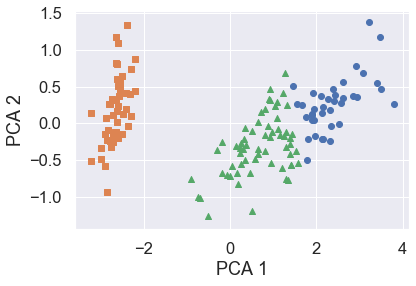

In [12]:
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

plt.scatter(x=iris_df.loc[marker0_ind, 'pca_x'], y=iris_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[marker1_ind, 'pca_x'], y=iris_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_ind, 'pca_x'], y=iris_df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


iris_df[marker0_ind] 가 안되는 것은 인덱스가 리스트 형태로 여러개 들어가 있기 때문이다. 
iris_df[]의 경우는 : 를 써서 슬라이싱 해야한다. 그러므로 loc을 써서 슬라이싱 하자

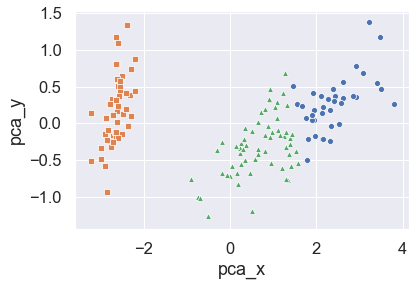

In [13]:
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

sns.scatterplot(iris_df.loc[marker0_ind, 'pca_x'], iris_df.loc[marker0_ind, 'pca_y'], marker='o')
sns.scatterplot(iris_df.loc[marker1_ind, 'pca_x'], iris_df.loc[marker1_ind, 'pca_y'], marker='s')
sns.scatterplot(iris_df.loc[marker2_ind, 'pca_x'], iris_df.loc[marker2_ind, 'pca_y'], marker='^')

군집화 연습을 위해 샘플 데이터를 만들어보자

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [15]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [16]:
X

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265],
       [ 0.65372852,  5.28174338],
       [-0.97188549,  2.79022351],
       [ 1.58510026,  4.40112734],
       [ 1.29307545,  3.42933812],
       [ 0.25043139,  4.34534364],
       [-1.07307179,  2.73974218],
       [ 2.68432989,  0.52452838],
       [ 2.16883005,  0.64220093],
       [ 0.32575305,  2.92276125],
       [-3.15145159,  4.56947655],
       [-1.06408682,  3.19760583],
       [ 1.45946366,  0.23651283],
       [ 1.01287689,  4.15404025],
       [ 1.73407165,  4.17977925],
       [-3.3313554 ,  2.09987679],
       [-0.3148482 ,  4.1335951 ],
       [ 1.5403728 , -0.88105886],
       [-2.13821915,  1.76764908],
       [-0.84056487,

In [17]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [18]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [19]:
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


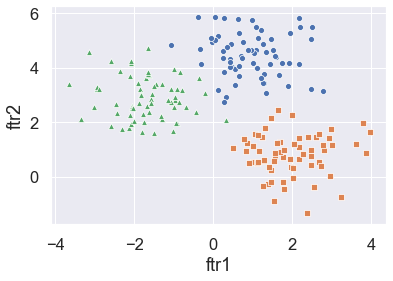

In [20]:
target_list = np.unique(y)
markers = ['o','s','^','P','H','x']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']== target]
    sns.scatterplot(target_cluster['ftr1'], target_cluster['ftr2'], marker=markers[target])
    

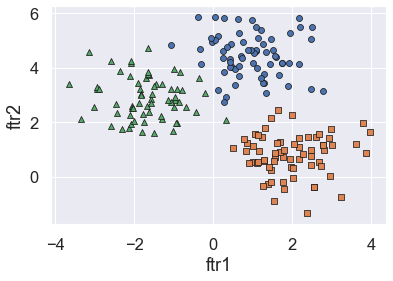

In [21]:
target_list = np.unique(y)
markers = ['o','s','^','P','H','S']

for target in target_list:
    cluster_target = cluster_df[cluster_df['target'] == target]
    sns.scatterplot(x=cluster_target['ftr1'], y=cluster_target['ftr2'], marker = markers[target], edgecolor='k')

cluster_centers 속성으로 개별 군집의 중심 위치 좌표를 나타내보자

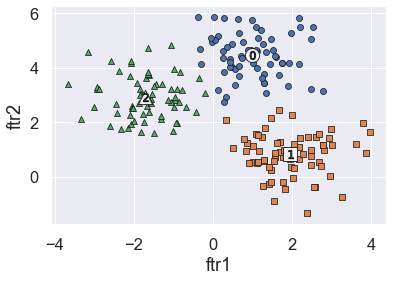

In [23]:
kmeans =KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    cluster_label = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    sns.scatterplot(cluster_label['ftr1'], cluster_label['ftr2'], marker=markers[label], edgecolor='k')
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                    edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='white', edgecolor='k', marker='$%d$' % label)

In [24]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


seaborn으로 scatterplot을 사용하는 경우 If using all scalar values, you must pass an index 라는 경고창이 나온다.
이게 어떤 error고 어떻게 문제를 해결해야 하는지 알아보자.

In [ ]:
kmeans =KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

centers = pd.DataFrame(kmeans.cluster_centers_, columns=('x','y'))
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    cluster_label = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers.loc[label]
    sns.scatterplot(cluster_label['ftr1'], cluster_label['ftr2'], marker=markers[label], edgecolor='k')
    
    # 군집별 중심 위치 좌표 시각화
    sns.scatterplot(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                    edgecolor='k', marker=markers[label])
    sns.scatterplot(x=center_x_y[0], y=center_x_y[1], s=70, color='white', edgecolor='k', marker='$%d$' % label)

In [ ]:
centers.loc[0][0]